In [523]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

# Set data files
mouse_metadata_file = "data/Mouse_metadata.csv"
study_results_file = "data/Study_results.csv"

# Read data files
mouse_metadata = pd.read_csv(mouse_metadata_file)
study_results = pd.read_csv(study_results_file)

mouse_data_merge = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
mouse_data_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [524]:
# Count the number of mice
count_mice = mouse_metadata["Mouse ID"].count()
count_mice

249

In [525]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_data_merge[mouse_data_merge.duplicated(['Mouse ID','Timepoint'])]["Mouse ID"].unique()
duplicate_mice


array(['g989'], dtype=object)

In [526]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = mouse_data_merge.loc[mouse_data_merge["Mouse ID"].isin(duplicate_mice),:]
duplicate_mice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [527]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_clean = mouse_data_merge.drop(duplicate_mice_df.index)
mouse_data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [528]:
# Checking the number of mice in the clean DataFrame.
mouse_data_clean["Mouse ID"].nunique()

248

# Summary Statistics

In [529]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_stats_avg = mouse_data_clean.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
summary_stats_med = mouse_data_clean.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
summary_stats_var = mouse_data_clean.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
summary_stats_std = mouse_data_clean.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
summary_stats_sem = mouse_data_clean.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({
    "Mean Tumor Volume":summary_stats_avg,
    "Median Tumor Volume":summary_stats_med,
    "Tumor Volume Variance":summary_stats_var,
    "Tumor Volume Std. Dev.":summary_stats_std,
    "Tumor Volume Std. Err.":summary_stats_sem
})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [530]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_statistics_agg = mouse_data_clean.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"],})
summary_statistics_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

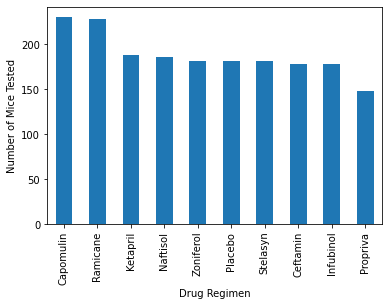

In [531]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_time_bar_df = mouse_data_clean.groupby("Drug Regimen").agg({"Timepoint":["count"]})
drug_time_bar_df.columns = ["Timepoint Count"]

drug_time_bar_df = drug_time_bar_df.sort_values("Timepoint Count",ascending=False)
drug_time_bar_df.plot(kind="bar", figsize=(6,4), legend=False,)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

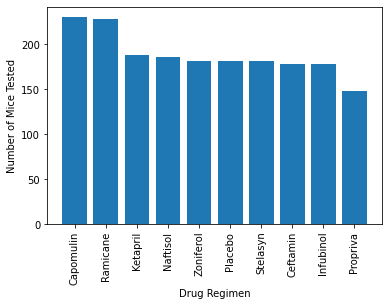

In [532]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = drug_time_bar_df.index
y_axis = drug_time_bar_df[("Timepoint Count")]

plt.bar(x_axis, y_axis)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()




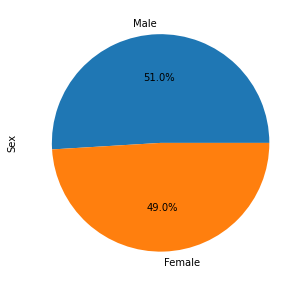

In [533]:
# Generate a pit plot showing the distribution of female versus male mice using Pandas
x_pie = mouse_data_clean["Sex"].unique()
y_pie = mouse_data_clean["Sex"].value_counts()

mouse_data_clean["Sex"].value_counts().plot(kind="pie", y=x_pie, autopct="%1.1f%%", figsize=(5,5))
plt.ylabel("Sex")
plt.show()

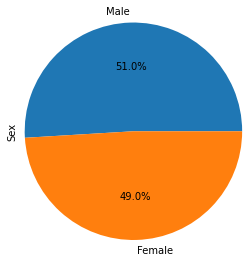

In [534]:
# Generate a pit plot showing the distribution of female versus male mice using pyplot
labels_pie = ["Male","Female"]
plt.pie(y_pie, labels= labels_pie, autopct="%1.1f%%", radius=1.25)
plt.ylabel("Sex")
plt.show()

# Quartiles, Outliers and Boxplots

In [535]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tp_per_mouse = mouse_data_clean.groupby(["Mouse ID", "Drug Regimen"]).max()["Timepoint"]
greatest_tp_per_mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_clean_data = pd.merge(greatest_tp_per_mouse, mouse_data_clean, how="left", on=["Timepoint", "Drug Regimen", "Mouse ID"])
new_clean_data.head()


,Timepoint,Drug Regimen,Mouse ID,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,45,Infubinol,a203,67.973419,2,Female,20,23
1,45,Infubinol,a251,65.525743,1,Female,21,25
2,45,Placebo,a262,70.717621,4,Female,17,29
3,45,Ceftamin,a275,62.999356,3,Female,20,28
4,30,Stelasyn,a366,63.440686,1,Female,16,29


In [536]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
for i in treatments:
    tum_vol = new_clean_data.loc[new_clean_data["Drug Regimen"]==i, "Tumor Volume (mm3)"]
    tumor_vol_data.append(tum_vol)

    # Determine outliers using upper and lower bounds
    quartiles = tum_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier_tumors = tum_vol.loc[(tum_vol > upper_bound) | (tum_vol < lower_bound)]

    print(f"{treatments}'s potential outliers: {outlier_tumors}")

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']'s potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


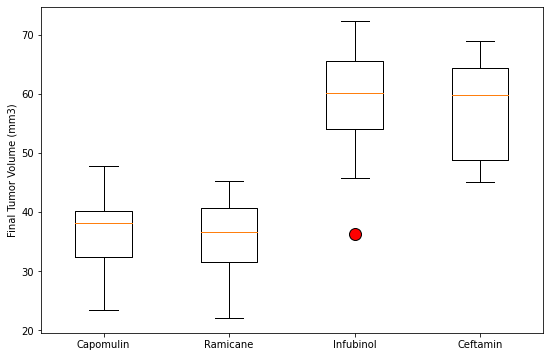

In [537]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
red_circle = dict(markerfacecolor="red", marker="o", markersize=12)
fig, ax1 = plt.subplots(figsize=(9,6))
plt.boxplot(tumor_vol_data, flierprops=red_circle)
ax1.set_xticklabels(treatments)
ax1.set_ylabel("Final Tumor Volume (mm3)")
plt.show()